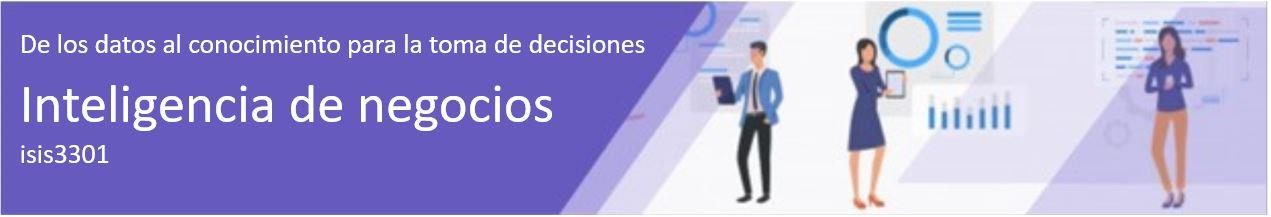

# Laboratorio 1 - Regresión

- ### Estudiante 1: 
- ### Estudiante 2:
- ### Estudiante 3:
-Este notebook presenta el desarrollo de un flujo completo de modelado predictivo orientado a estimar el valor de mercado de jugadores de fútbol a partir de sus estadísticas de rendimiento. Para ello, se sigue la metodología ASUM-DM, abordando de manera estructurada cada una de sus etapas: en primer lugar, se realiza el entendimiento y perfilamiento de los datos, identificando su calidad y las variables más relevantes; posteriormente, se lleva a cabo la preparación y preprocesamiento, resolviendo problemas de consistencia y transformando los datos para el modelado. A continuación, se construye un modelo de regresión lineal, evaluado mediante métricas cuantitativas y validaciones estadísticas, además de una interpretación cualitativa de sus coeficientes. Finalmente, se presentan los resultados de forma clara y se exporta el mejor modelo en un pipeline, junto con las predicciones generadas sobre los datos de prueba, garantizando su reutilización en un entorno de producción.ión.


Este notebook se encuentra dividido en las siguientes secciones:

1. Carga de los datos
2. Entendimiento y limpieza de datos
3. Preparación de datos
4. Modelado
5. Evaluación cuantitativa
6. Evaluación cualitativa
7. Exportar modelo
8. Generar predicción


### TODO BORRAR AL FINAL:

Posible estructura entendimiento y preparación de datoss

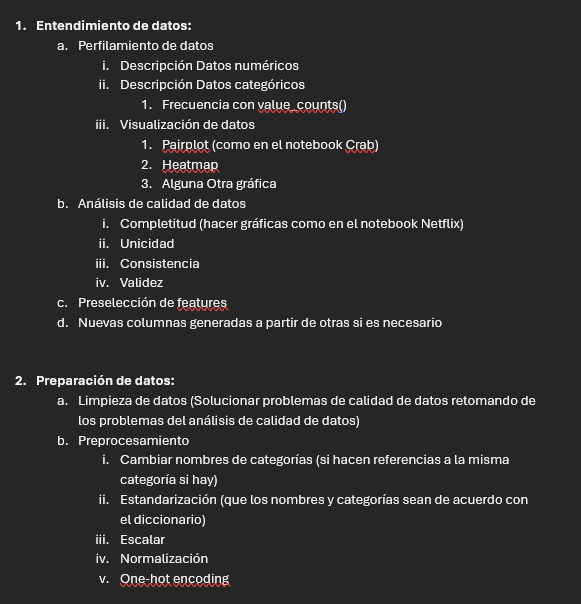

## 1. Carga de los datos

En esta etapa se importan las librerías necesarias, se cargan los datos, y se hace una manipulación básica de los datos 

In [1734]:
# Librerias generales

# Pandas
import pandas as pd
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar

# Numpy
import numpy as np

# Persistencia modelo
from joblib import dump, load

# Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# scipy
import scipy.stats as stats

In [1735]:
# Ubicación de la base de datos
db_location = 'datos_entrenamiento_laboratorio1(train_data).csv'

In [1736]:
# Cargar los datos
df_players=pd.read_csv(db_location, sep=',', encoding = "ISO-8859-1")

In [1737]:
# Ver los datos
display(df_players.sample(5)) # Muestra

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
43074,Adrien Rabiot,fr FRA,"AM,CM",29-298,"Sunday January 26, 2025",0,3,0.3,0.3,0.0,0.0,1,53,53,53,6,6,0,0,10,2,0.0,0.0,0.0,4,53,0,0,2,40,40,40,0,2,0,28,6,0.0,1,1,1,1,48,8,1,2,2,100.0,â¬25.00m,30.06.2026
7185,Pedro Porro,es ESP,RB,25-135,"Sunday January 26, 2025",0,5,0.2,0.2,0.5,0.5,8,94,94,94,7,7,2,2,21,11,0.5,0.5,0.5,8,77,15,0,12,68,68,68,2,2,0,34,2,100.0,0,0,0,0,62,5,0,12,2,50.0,â¬38.00m,30.06.2028
43247,Melvin Bard,fr FRA,"CB,WB",24-088,"Sunday February 2, 2025",0,0,0.0,0.0,0.0,0.0,2,56,56,56,2,2,1,1,27,3,0.0,0.0,0.1,1,48,8,0,2,45,45,45,0,7,0,4,0,100.0,0,0,1,0,41,5,0,2,2,66.7,â¬15.00m,30.06.2028
10125,Victor Lindelof,se SWE,CB,30-270,"Sunday April 13, 2025",0,0,0.0,0.0,0.0,0.0,0,42,42,42,0,0,0,0,22,1,0.0,0.0,0.0,1,41,1,0,0,40,40,40,0,4,0,0,0,NaN,0,0,0,0,32,0,1,0,0,0.0,NaN,NaN
13874,Julen Agirrezabala,es ESP,GK,23-268,"Thursday September 19, 2024",0,0,0.0,0.0,0.0,0.0,0,35,35,35,0,0,0,0,9,7,0.0,0.0,0.0,0,22,12,0,0,20,20,20,1,0,0,0,0,NaN,0,0,0,0,12,0,0,0,0,NaN,â¬15.00m,30.06.2026


## 2. Entendimiento de los datos

En esta etapa se realizan los pasos de perfilamiento y análisis de calidad de datos para determinar el esfuerzo que se requiere a nivel de preparación de los datos. En ese sentido, en esta etapa des crucial identificar caracteristicas como outliers, nulos, duplicados, etc. Además, es relevante preseleccionar las variables que postularemos como más importantes para el proceso de modelado. 

In [1740]:
# Dimensiones de los datos
df_players.shape

(57934, 50)

### 2.1. Perfilamiento de datos 

In [1742]:
# Imprimimos los diferentes tipos de las columnas
df_players.dtypes

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
xAG.1                             float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_intentados.1                  int64
Pases_intentados.2                  int64
Pases_progresivos                   int64
Pases_progresivos.1                 int64
Regates_exitosos                    int64
Regates_exitosos.1                  int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xAG.2                             float64
xAG.3                             float64
xA                                

En un primer acercamiento, es posible notar que hay columnas que difieren de lo esperado de acuerdo con el diccionario del caso. Por ejemplo, edad debería ser un entero; market_value debería ser de tipo float; contract_date debería ser de tipo Date, etc. Desde este momento es posible evidenciar que existen columnas repetidas tales como Pases_intentados, Pases_intentados.1 y Pases_intentados.2, entre otras. A continuacion realizamos una revision más profunda de los datos crudos dependiendo de si estos son numéricos o categóricos. 

#### 2.1.1. Datos numéricos

En esta sección se caracterizan las columnas numéricas mediante sus atributos estadísticos más relevantes, tal que se puedan identificar, en los datos crudos, valores que sobresalgan la lógica del problema, por ejemplo. 

In [1746]:
# Se obtienen las estadísticas principales de las columnas numéricas
numerical_vars = df_players.select_dtypes(include=['float64', 'int64']).columns
# Calcular estadísticas descriptivas
stats = df_players[numerical_vars].describe().T
# Agregar mediana
stats['median'] = df_players[numerical_vars].median()
df_players.describe()

,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados
count,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,29212.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000
mean,0.513015,0.792402,0.088635,0.080473,0.062784,0.062784,1.416750,31.659716,31.659716,31.659716,2.416232,2.416232,0.487451,0.487451,11.226309,2.341941,0.062784,0.062784,0.055056,1.976232,28.593900,2.956140,0.096196,1.133652,25.745624,25.745624,25.745624,0.109677,1.502727,0.041513,9.201091,1.410950,43.171587,0.534522,0.801809,0.950133,0.574033,25.518383,2.382470,0.781337,1.133652,0.834795,48.814187
std,16.440600,1.158538,0.209810,0.186549,0.152033,0.152033,1.727395,22.963272,22.963272,22.963272,2.756341,2.756341,0.897683,0.897683,10.984869,2.867533,0.152033,0.152033,0.122355,2.583320,21.511297,3.733981,0.342576,2.005869,20.703206,20.703206,20.703206,0.345491,2.169317,0.207865,9.322087,1.957006,40.232967,0.934409,1.210875,1.221368,0.931852,19.001270,3.158174,1.005105,2.005869,1.305149,39.560765
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,28.000000,28.000000,2.000000,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,24.000000,1.000000,0.000000,0.000000,21.000000,21.000000,21.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,50.000000
75%,0.000000,1.000000,0.100000,0.100000,0.100000,0.100000,2.000000,45.000000,45.000000,45.000000,4.000000,4.000000,1.000000,1.000000,16.000000,3.000000,0.100000,0.100000,0.100000,3.000000,40.000000,4.000000,0.000000,1.000000,37.000000,37.000000,37.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,1.000000,100.000000
max,995.000000,12.000000,2.900000,2.900000,2.100000,2.100000,16.000000,171.000000,171.000000,171.000000,30.000000,30.000000,15.000000,15.000000,95.000000,24.000000,2.100000,2.100000,1.400000,37.000000,170.000000,35.000000,8.000000,25.000000,163.000000,163.000000,163.000000,5.000000,21.000000,3.

In [1747]:
stats

,count,mean,std,min,25%,50%,75%,max,median
Goles,57934.0,0.513015,16.440600,-5.0,0.0,0.0,0.0,995.0,0.0
Tiros Totales,57934.0,0.792402,1.158538,0.0,0.0,0.0,1.0,12.0,0.0
xG,57934.0,0.088635,0.209810,0.0,0.0,0.0,0.1,2.9,0.0
npxG,57934.0,0.080473,0.186549,0.0,0.0,0.0,0.1,2.9,0.0
xAG,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.1,2.1,0.0
xAG.1,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.1,2.1,0.0
Acciones_que_crean_tiros,57934.0,1.416750,1.727395,0.0,0.0,1.0,2.0,16.0,1.0
Pases_intentados,57934.0,31.659716,22.963272,0.0,13.0,28.0,45.0,171.0,28.0
Pases_intentados.1,57934.0,31.659716,22.963272,0.0,13.0,28.0,45.0,171.0,28.0
Pases_intentados.2,57934.0,31.659716,22.963272,0.0,13.0,28.0,45.0,171.0,28.0


Se puede ver a primera vista errores de consistencia como que, para un partido, el mínimo número de goles sea -5, mientras que el máximo es de 995, pues son límites que exceden la lógica del problema. También se observa la repetición de columnas como xAG y Pases_intentados. Por otra parte, no se reconocen columnas que sean numéricas no ordinales.

#### 2.1.2. Datos no numéricos

Para esta parte se revisan las distintas columnas no numéricas y las frecuencias relativas de cada valor de algunas de ellas.

In [1751]:
# Seleccionar las columnas no numéricas
category_cols = df_players.select_dtypes(exclude = ['int','float']).columns
category_cols

#resumen

df_players[category_cols].describe()

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,market_value,contract_date
count,57934,57902,57934,57886,57934,45040,45018
unique,2242,110,452,7114,198,95,11
top,Vitinha,fr FRA,CB,24-231,"Saturday May 10, 2025",â¬5.00m,30.06.2028
freq,166,9351,9537,37,997,2332,11316


Se puede apreciar que columnas como el día del partido aportan poco a la estadística, pues respecto a la totalidad de registros, su variabilidad no es tanta. Adicionalmente, sobre esta misma columna es notable que en sí no afecta mucho al precio que se le atribuya a un jugador, pues el día del partido no debería ser relevante para su desempeño. En ese sentido, esta variable cobra relevancia cuando consideramos que hay jugadores que han disputado más partidos que otros, lo cual es indicado por esta variable. A continuación, se revisa más a detalle la distribución de algunas de las otras columnas. Además, como se dijo antes, se observa que columnas como Edad y market_value deberían ser de tipo "int". La transformación al tipo correcto se realizará en la etapa de preparación de datos

In [1753]:
# Se revisan los diferentes valores de la columna contract_date con su respectiva frecuencia relativa e incluyendo los datos nulos
df_players['contract_date'].value_counts(dropna = False, normalize = True)

contract_date
NaN           0.222943
30.06.2028    0.195326
30.06.2026    0.178772
30.06.2027    0.161908
30.06.2029    0.133687
30.06.2030    0.072859
-             0.017002
30.06.2031    0.012134
30.06.2033    0.002209
30.06.2032    0.002089
30.06.2034    0.000570
30.06.2035    0.000501
Name: proportion, dtype: float64

Vemos, por ejemplo, que una gran parte de los valores de la columna contract_date son nulos.

Ahora podemos ver las frecuencias relativas y absolutas por cada tipo de posición

In [1756]:
# Split positions and explode into rows
# Hacemos split de las posiciones y aplicacmos explode para separa las diferentes posiciones en rows
positions = df_players["Posicion"].str.split(",").explode()

In [1757]:
# vemos las frecuencias relativas:
rel_freq = positions.value_counts(dropna = False, normalize = True)
rel_freq

Posicion
CB    0.157339
FW    0.125724
CM    0.120070
DM    0.080147
AM    0.076529
LW    0.064151
RB    0.063005
RW    0.062553
LB    0.060261
GK    0.060110
LM    0.045169
RM    0.044868
WB    0.040074
Name: proportion, dtype: float64

#### 2.1.3. Visualizaciones y preselección de variables.

Primero veremos un scatter plot de market_value versus las columnas numéricas, para visualizar la correlación entre las variables de entrada y la variable objetivo. Se agregan las columnas con el mismo jugador para que las gráficas sean más interpretables y que los datos sean más concisos.

Asimismo, la preselección de variables se hizo para quedarse solo con aquellas que aportan información clave sobre el rendimiento de los jugadores y que, al mismo tiempo, pueden resumirse de manera clara con operaciones de agregación como suma, promedio o máximo. Se eligieron variables relacionadas con la capacidad ofensiva (goles, tiros, xG, asistencias, acciones de creación), con la calidad del pase (intentos, progresivos, en último tercio, al hueco, largos, medios, centros), con la habilidad individual (regates, toques en zona ofensiva, acarreos), con el aporte defensivo (duelos aéreos ganados, errores defensivos) y con indicadores globales de valor como el market value. 

Más adelante haremos la selección final de variables en la preparación de datos.

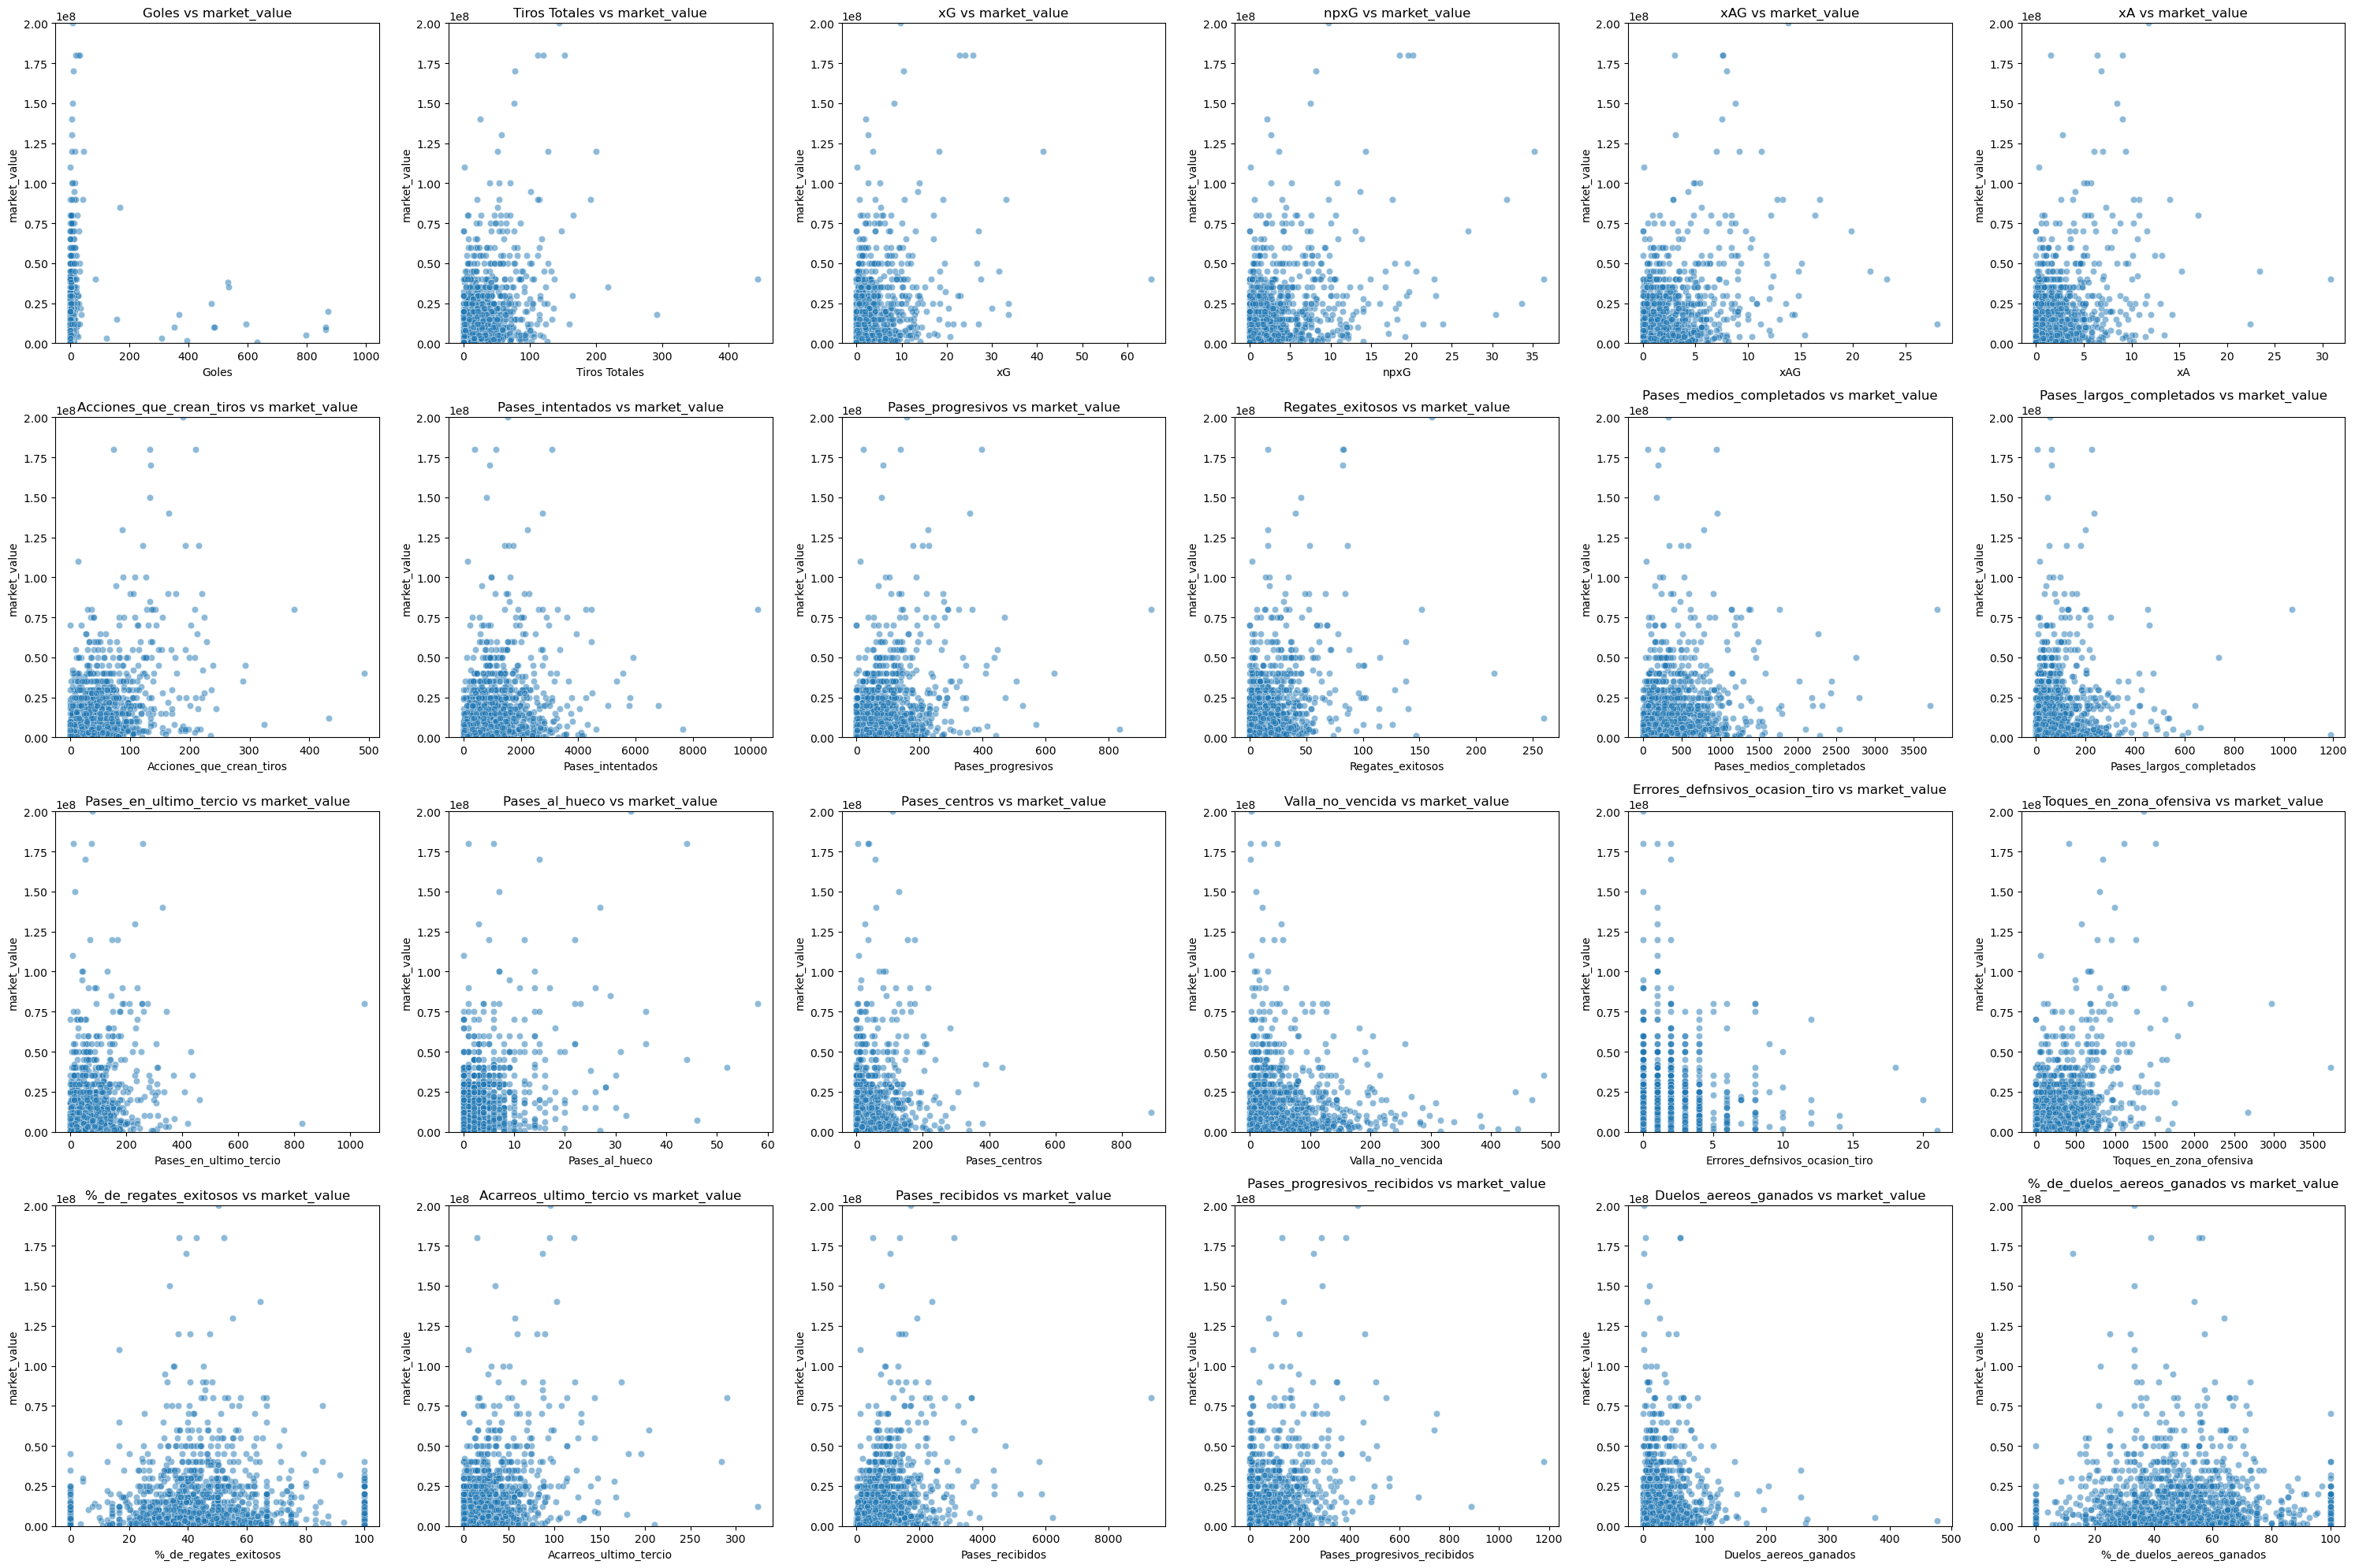

In [1760]:
# Duplicamos el data set
df_copy = df_players.copy()

#df_copy.columns = make_unique(df_copy.columns)

# Función para limpiar el market_value
def limpiar_market_value(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    if val in ["-", "error", ""]:
        return np.nan

    # Eliminar los primeros 3 valores con caracteres especiales
    val = val[3:] if len(val) > 3 else val

    # transformamos de millones a miles
    try:
        if val.endswith("m"):  
            return float(val[:-1]) * 1_000_000
        elif val.endswith("k"):  
            return float(val[:-1]) * 1_000
        else:  
            return float(val)
    except ValueError:
        return np.nan

df_copy["market_value"] = df_copy["market_value"].apply(limpiar_market_value)

# Para que los plots sean más interpretables agregaremos los datos y preseleccionaremos un subconjutno relevante de features
agg_dict_visualization = {
    "Goles": "sum",
    "Tiros Totales":"sum",
    "xG": "sum",
    "npxG": "sum",
    "xAG": "sum",
    "xA": "sum",
    "Acciones_que_crean_tiros": "sum",
    "Pases_intentados": "sum",
    "Pases_progresivos": "sum",
    "Regates_exitosos": "sum",
    "Pases_medios_completados": "sum",
    "Pases_largos_completados": "sum",
    "Pases_en_ultimo_tercio": "sum",
    "Pases_al_hueco": "sum",
    "Pases_centros": "sum",
    "Valla_no_vencida": "sum",
    "Errores_defnsivos_ocasion_tiro": "sum",
    "Toques_en_zona_ofensiva": "sum",
    "%_de_regates_exitosos": "mean",
    "Acarreos_ultimo_tercio": "sum",
    "Pases_recibidos": "sum",
    "Pases_progresivos_recibidos": "sum",
    "Duelos_aereos_ganados": "sum",
    "%_de_duelos_aereos_ganados": "mean",
    "market_value": "max"
}

df_copy_comb = df_copy.groupby("Jugador", as_index=False).agg(agg_dict_visualization)

# Hacemos scatter plot por cada variable 
features = [col for col in agg_dict_visualization.keys() if col != "market_value"]

n_features = len(features)
cols_per_row = 6
rows = 4

fig, axes = plt.subplots(rows, cols_per_row, figsize=(30, 20))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.scatterplot(
        data=df_copy_comb, 
        x=col, 
        y="market_value", 
        alpha=0.5, 
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs market_value")
    axes[i].set_ylim(0, 2e8)


plt.tight_layout()
plt.show()

Los scatter plots muestran que la mayoría de los valores se concentran generando clusters en valores bajos de los ejes x y y. Para algunos atributos se puede ver que la correlación no es tan fuerte con la variable objetivo.

También podemos visualizar un heatmap de estas variables para entender su correlación.

<Axes: >

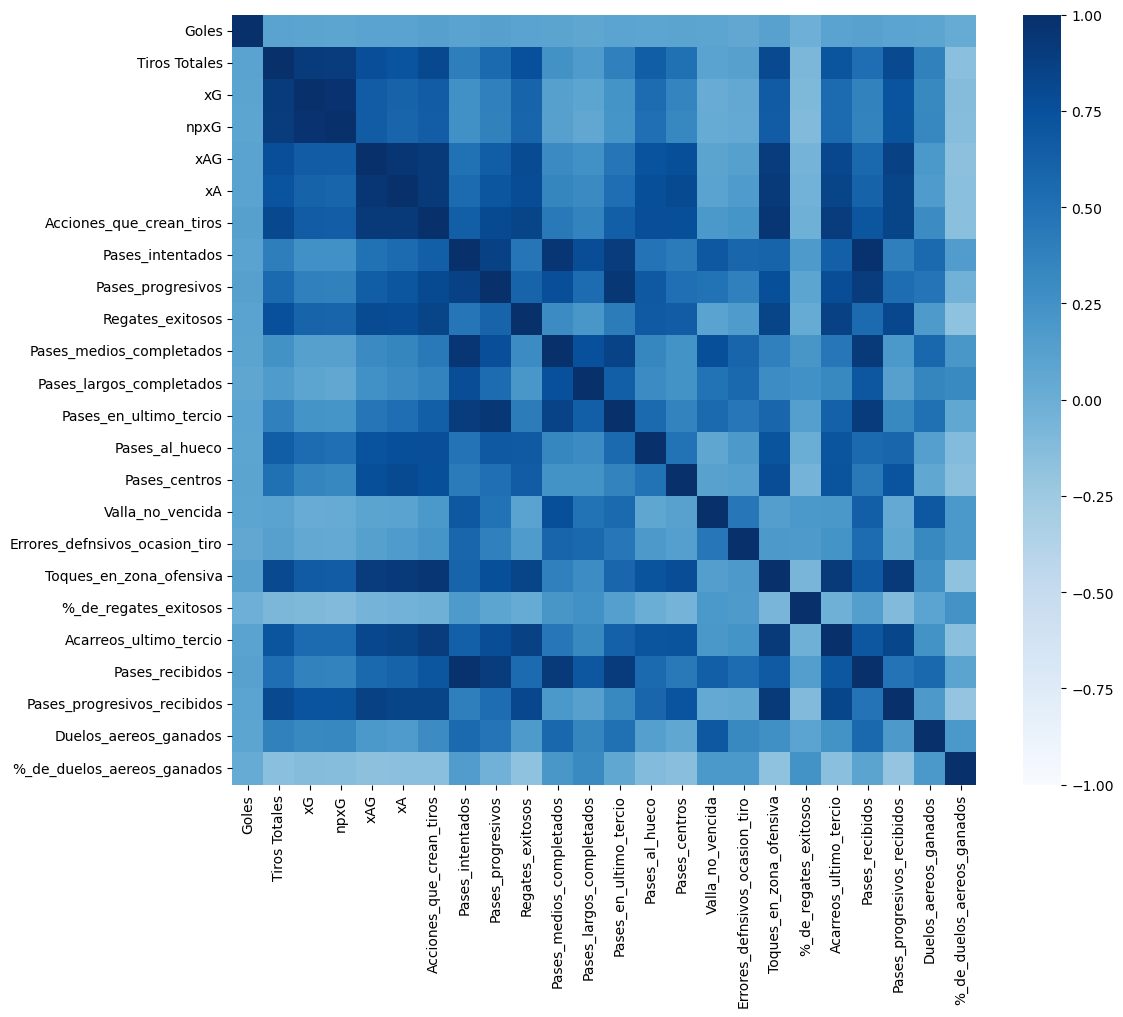

In [1763]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_copy_comb[features].corr(), cmap="Blues", vmin=-1, vmax=1)

Se puede ver que existe una fuerte correlación en atributos como npxG y xG, xA y xAGo pases recibidos y pases intentados. Este análisis se retomará en la preselección de atributos y en la sección de comprobación de supuestos.

También podemos visualizar un boxplot del market value para ver la distribución de estos datos.

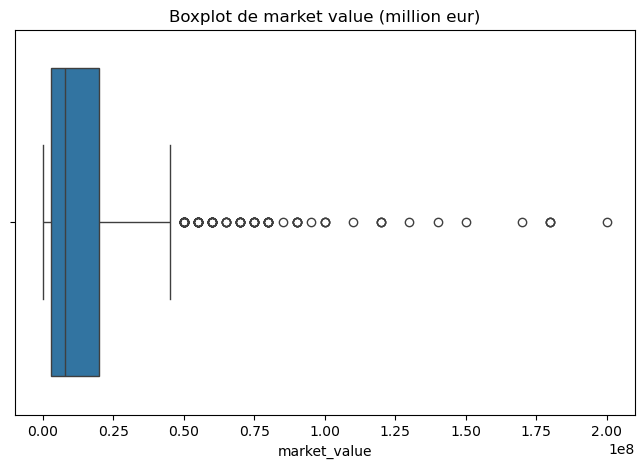

In [1766]:
# Con esto podemos deshacernos de valores que se salen de proporción y probablemente son errores al meter los datos a la base de datos:
df_copy_comb = df_copy_comb[
    (df_copy_comb["market_value"] <= 0.4*10**9)
]

plt.figure(figsize=(8,5))
sns.boxplot(data=df_copy_comb, x="market_value")
plt.title("Boxplot de market value (million eur)")
plt.show()


Entre aprox. Q1 = 0.01 y Q = 0.2 millones de euros, es el rango común del market value de los jugadores. Existe una baja dispersión para el límite seleccionado.

### 2.2 Análisis de calidad de datos

En esta sección se hace un análisis de la completitud, unicidad, consistencia y validez de los datos. Las soluciones a los problemas se trabajarán en la limpieza de datos.

#### 2.2.1. Completitud

Aquí se determina si hay problemas de completitud en los datos, con el fin de reportarlos y señalar posibles soluciones que serán abordadas en la fase de preparación de datos.


In [1771]:
# Cálculo de porcentaje de valores nulos por columna
(100*(df_players.isnull().sum()/df_players.shape[0])).sort_values(ascending=False)

%_de_regates_exitosos             49.577105
%_de_duelos_aereos_ganados        36.173922
contract_date                     22.294335
market_value                      22.256361
Edad                               0.082853
Nacionalidad                       0.055235
Centros                            0.000000
Faltas_cometidas                   0.000000
Pases_al_hueco                     0.000000
Pases_centros                      0.000000
Pases_completados                  0.000000
Pases_completados.1                0.000000
Pases_completados.2                0.000000
Pases_fuera_de_juego               0.000000
Valla_no_vencida                   0.000000
Errores_defnsivos_ocasion_tiro     0.000000
Toques_en_zona_ofensiva            0.000000
Toques_en_area_rival               0.000000
Duelos_aereos_ganados              0.000000
Pases_balon_muerto                 0.000000
Acarreos_ultimo_tercio             0.000000
Malos_controles                    0.000000
Perdida_balon                   

Vemos que columnas como %_de_regates_exitosos, %_de_duelos_aereos_ganados, contract_date y market_value tienen un alto procentaje de incompletitud. Para solucionar esta situación se puede obtar por la imputación de valores como promedio o la eliminación de registros o columnas                 

#### 2.2.2. Unicidad

Se detectan las filas con valores repetidos, ya sea en todas sus columnas o en aquellas que deberían ser únicas, como un identificador o una combinación de columnas específicas.

In [1774]:
# Ordenamos por todas las columnas para que los duplicados queden adyacentes
df_sorted = df_players.sort_values(by=df_players.columns.tolist())

# Filtramos solo las filas que son duplicadas
duplicadas = df_sorted[df_sorted.duplicated(keep=False)]

print(f"Número de filas duplicadas completas: {duplicadas.shape[0]}")

# Mostramos las duplicadas ya ordenadas (adyacentes)
display(duplicadas.head(16))

Número de filas duplicadas completas: 20966


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
509,Aaron Cresswell,eng ENG,LB,34-253,"Saturday August 24, 2024",0,0,0.0,0.0,0.0,0.0,0,2,2,2,0,0,0,0,0,0,0.0,0.0,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,0,0,1,100.0,NaN,NaN
57759,Aaron Cresswell,eng ENG,LB,34-253,"Saturday August 24, 2024",0,0,0.0,0.0,0.0,0.0,0,2,2,2,0,0,0,0,0,0,0.0,0.0,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,0,0,1,100.0,NaN,NaN
42880,Aaron Malouda,fr FRA,FW,19-056,"Saturday January 25, 2025",0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN
52717,Aaron Malouda,fr FRA,FW,19-056,"Saturday January 25, 2025",0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN
500,Aaron WanBissaka,eng ENG,RB,26-272,"Saturday August 24, 2024",0,0,0.0,0.0,0.0,0.0,2,7,7,7,0,0,2,2,1,0,0.0,0.0,0.0,0,6,1,0,0,3,3,3,0,1,0,1,0,100.0,0,0,1,2,3,0,0,0,0,NaN,â¬24.00m,30.06.2031
57750,Aaron WanBissaka,eng ENG,RB,26-272,"Saturday August 24, 2024",0,0,0.0,0.0,0.0,0.0,2,7,7,7,0,0,2,2,1,0,0.0,0.0,0.0,0,6,1,0,0,3,3,3,0,1,0,1,0,100.0,0,0,1,2,3,0,0,0,0,NaN,â¬24.00m,30.06.2031
37824,Abakar Sylla,ci CIV,CB,21-237,"Sunday August 18, 2024",0,0,0.0,0.0,0.0,0.0,1,33,33,33,0,0,1,1,11,3,0.0,0.0,0.0,0,24,9,0,0,30,30,30,0,0,0,3,0,100.0,0,0,1,0,20,0,3,0,1,100.0,â¬10.00m,30.06.2028
47594,Abakar Sylla,ci CIV,CB,21-237,"Sunday August 18, 2024",0,0,0.0,0.0,0.0,0.0,1,33,33,33,0,0,1,1,11,3,0.0,0.0,0.0,0,24,9,0,0,30,30,30,0,0,0,3,0,100.0,0,0,1,0,20,0,3,0,1,100.0,â¬10.00m,30.06.2028
38105,Abakar Sylla,ci CIV,CB,21-244,"Sunday August 25, 2024",0,1,0.1,0.1,0.0,0.0,1,105,105,105,0,0,0,0,54,3,0.0,0.0,0.0,1,92,13,0,0,90,90,90,0,6,0,2,1,NaN,0,0,0,0,78,0,1,0,5,83.3,â¬10.00m,30.06.2028
47878,Abakar Sylla,ci CIV,CB,21-244,"Sunday August 25, 2024",0,1,0.1,0.1,0.0,0.0,1,105,105,105,0,0,0,0,54,3,0.0,0.0,0.0,1,92,13,0,0,90,90,90,0,6,0,2,1,NaN,0,0,0,0,78,0,1,0,5,83.3,â¬10.00m,30.06.2028


In [1775]:
df_players.duplicated().sum()

10483

Vemos que existe una gran cantidad de filas repetidas.

Así mismo, veamos que existen filas duplicadas parciales, es decir, registros que aunque no son exactamente iguales comparten valores que no deberian serlo. Un claro ejemplo son registros que comparten jugador y dia_partido, pues no tiene sentido que el mismo jugador tenga varios partidos jugados en el mismo dia, en ese sentido ambos registros se refieren al mismo evento y mantenerlos equivale a hacer un sobreconteo. 



In [1777]:
#Filas duplicadas parciales

# Detectar duplicados por Jugador + Dia_partido
duplicados_parciales = df_players[df_players.duplicated(subset=['Jugador', 'Dia_partido'], keep=False)]

print("Ejemplos de duplicados parciales (Jugador + Dia_partido):")
display(duplicados_parciales.sort_values(by=['Jugador','Dia_partido']).head(6))

Ejemplos de duplicados parciales (Jugador + Dia_partido):


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
509,Aaron Cresswell,eng ENG,LB,34-253,"Saturday August 24, 2024",0,0,0.0,0.0,0.0,0.0,0,2,2,2,0,0,0,0,0,0,0.0,0.0,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,0,0,1,100.0,NaN,NaN
57759,Aaron Cresswell,eng ENG,LB,34-253,"Saturday August 24, 2024",0,0,0.0,0.0,0.0,0.0,0,2,2,2,0,0,0,0,0,0,0.0,0.0,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,0,0,1,100.0,NaN,NaN
42880,Aaron Malouda,fr FRA,FW,19-056,"Saturday January 25, 2025",0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN
52717,Aaron Malouda,fr FRA,FW,19-056,"Saturday January 25, 2025",0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN
1921,Aaron Ramsdale,eng ENG,GK,26-139,"Monday September 30, 2024",0,0,0.0,0.0,0.0,0.0,0,55,55,55,0,0,0,0,18,9,0.0,0.0,0.0,1,49,6,0,0,41,41,41,0,0,0,0,0,NaN,0,0,0,0,40,0,0,0,0,NaN,â¬16.00m,30.06.2026
1922,Aaron Ramsdale,eng ENG,GK,26-139,"Monday September 30, 2024",0,0,0.0,0.0,0.0,0.0,0,55,55,55,0,0,0,0,18,9,0.0,0.0,0.0,1,49,6,0,0,41,41,41,0,0,0,0,0,NaN,0,0,0,0,40,0,0,0,0,NaN,â¬10.00m,30.06.2028


Aun no vale la pena contar cuantos de estas repeticiones parciales existen dado que no se han manejado las repeticiones en genereal. Respecto a otros posibles subconjuntos de repeticiones parciales no se identifican posibilidades que excedan la naturaleza del problema. 

Ahora podemos encontrar las columnas duplicadas:

In [1779]:
# Transponemos, borramos las columnas duplicadas y volvemos a transponer
unique_cols = df_players.T.drop_duplicates().T

# Encontramos las columnas repetidas
duplicated_cols = [col for col in df_players.columns if col not in unique_cols.columns]
duplicated_cols

['xAG.1',
 'Pases_intentados.1',
 'Pases_intentados.2',
 'Pases_progresivos.1',
 'Regates_exitosos.1',
 'xAG.2',
 'xAG.3',
 'Pases_completados.1',
 'Pases_completados.2',
 'Centros']

Se puede ver que las columnas duplicadas tienen un número al final, excepto Centros, que está duplicada con Pases_centros.                     

#### 2.2.3. Consistencia

Se analiza la integridad de los datos y entre las distintas columnas.

In [1782]:
# balón muerto y balón vivo deben ser igual o cercanos a Pases_intentados
cols_subpases = [
    "Pases_balon_muerto",
    "Pases_balon_vivo",
]

df_players_copy = df_players.copy()
# Calcular la suma de los sub-pases
df_players_copy["suma_subpases"] = df_players_copy[cols_subpases].sum(axis=1)

# suma_subpases <= Pases_intentados
df_players_copy["consistencia_pases"] = df_players_copy["suma_subpases"] <= df_players_copy["Pases_intentados"]

# Ver filas inconsistentes
inconsistentes = df_players_copy[~df_players_copy["consistencia_pases"]]

print("Filas inconsistentes:")
print(inconsistentes[["Pases_intentados", "suma_subpases"] + cols_subpases])


Filas inconsistentes:
Empty DataFrame
Columns: [Pases_intentados, suma_subpases, Pases_balon_muerto, Pases_balon_vivo]
Index: []


Vemos que no hay filas inconsistentes.

#### 2.2.4. Validez

Se revisa que los valores asignados tengan sentido para el negocio y estén en los rangos esperados

##### 2.2.4.1. Numéricos

In [1786]:
rangos = df_players.describe().loc[["min", "max"]]
rangos

,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados
min,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,995.0,12.0,2.9,2.9,2.1,2.1,16.0,171.0,171.0,171.0,30.0,30.0,15.0,15.0,95.0,24.0,2.1,2.1,1.4,37.0,170.0,35.0,8.0,25.0,163.0,163.0,163.0,5.0,21.0,3.0,102.0,25.0,100.0,10.0,16.0,10.0,8.0,159.0,36.0,9.0,25.0,16.0,100.0


Vemos que la variable goles está en un rango que no tiene sentido, ya que existen goles negativos y también algunos jugadores tienen anotaciones que están fuera del rango razonable.

##### 2.2.4.2. Categóricas

In [1789]:
# vemos las frecuencias absoluta de la variable categórica positions:
abs_freq = positions.value_counts()
abs_freq

Posicion
CB    10436
FW     8339
CM     7964
DM     5316
AM     5076
LW     4255
RB     4179
RW     4149
LB     3997
GK     3987
LM     2996
RM     2976
WB     2658
Name: count, dtype: int64

No se halla inconsistencia en el nombre de las posiciones. También es de recordar que las columnas Edad y Market value no se encuentran en el tipo correcto, como se vio en la sección de entendimiento de datos.

## 3. Preparación de datos

### 3.1. Limpieza de datos

Hacemos un poco de Limpieza de los datos para obtener un análisis más significativo de acuerdo a los hallazgos de la sección de análisis de caldiad de datos. Lo primero que hacemos es descartar las columnas repetidas identificadas en el entendimiento de datos:

In [1794]:
# Columnas repetidas
df_clean = df_players.drop(['xAG.1',
        'Pases_intentados.1',
        'Pases_intentados.2',
        'Pases_progresivos.1',
        'Regates_exitosos.1',
        'xAG.2',
        'xAG.3',
        'Pases_completados.1',
        'Pases_completados.2',
        'Centros', #igual que 'Pases_centros' de acuerdo con el diccionario
        ], axis=1)

df_clean.head()

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,1,14,4,0.0,4,51,8,0,8,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,0,0.0,â¬50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,0,2,1,0.1,2,30,0,0,1,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,100.0,â¬50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,0,0.0,â¬1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,3,0,0.1,0,11,0,0,1,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,50.0,â¬45.00m,30.06.2028


Lo segundo que haremos es dar formato a las columnas que tienen el tipo de dato incorrecto. Empezando por la columna de market_value, la cual es de gran importancia dado que es la variable objetivo. En ese sentido, aquellos registros que no tengan un valor aceptado pueden ser eliminadas pues no es imposible imputar o corregir este valor de alguna forma. Los valores no validos son aquellos que son vacios, la cadena "error" y el caracter "-". 

In [1796]:
##Dar foramto a market_value
print("Tamaño antes de eliminar invalidos del DataFrame:", df_clean.shape[0])

#Identificar las filas que tienen valores invalidos para market_value
valores_incorrectos = df_clean["market_value"].isin(["error", "-", ""]) | df_clean["market_value"].isna()

print("Filas con valor invalido de market_value: ", valores_incorrectos.sum())

#Eliminar filas con market_value invalido
df_clean = df_clean[~(
    df_clean["market_value"].isin(["error", "-", ""]) | df_clean["market_value"].isna()
)]

print("Tamaño despues de eliminar invalidos del DataFrame:", df_clean.shape[0])

#Ahora se aplica el formato aceptado para el market_value
df_clean["market_value"] = df_clean["market_value"].apply(limpiar_market_value).astype(int)

#Revisar el resultado
print(df_clean["market_value"]) 


Tamaño antes de eliminar invalidos del DataFrame: 57934
Filas con valor invalido de market_value:  13094
Tamaño despues de eliminar invalidos del DataFrame: 44840
0          50000000
1          50000000
3        1000000000
4          45000000
5          28000000
            ...    
57924      30000000
57925      40000000
57931      22000000
57932      12000000
57933       6000000
Name: market_value, Length: 44840, dtype: int32


Ahora damos formato a la edad. En este caso, también encontramos que haya filas que no reportan la edad para algunos jugadores, en tal caso se imputa la mediana, pues la edad no tiende a ser simétrica y, en general, lo que se esperaría es que haya más jugadores jóvenes que veteranos. 

In [1798]:
#Dar formato a la edad:
def limpiar_edad(valor):
    if pd.isna(valor): 
        return np.nan
    try:
        return int(str(valor).split("-")[0])
    except:
        return np.nan

# Aplicamos la limpieza inicial
df_clean["Edad"] = df_clean["Edad"].apply(limpiar_edad)

# Calculamos el promedio (ignorando NaN)
mediana_edad = df_clean["Edad"].median()

# Reemplazamos NaN por el promedio redondeado
df_clean["Edad"] = df_clean["Edad"].fillna(round(mediana_edad)).astype(int)
display(df_clean.head())
print(df_clean.shape)



,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,1,14,4,0.0,4,51,8,0,8,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,0,0.0,50000000,30.06.2027
1,Marcus Rashford,eng ENG,LW,26,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,0,2,1,0.1,2,30,0,0,1,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,100.0,50000000,30.06.2026
3,Amad Diallo,ci CIV,RW,22,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,0,0.0,1000000000,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,3,0,0.1,0,11,0,0,1,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,50.0,45000000,30.06.2028
5,Mason Mount,eng ENG,AM,25,"Friday August 16, 2024",0,1,0.3,0.3,0.1,3,15,1,0,1,0,0.0,1,15,0,0,0,11,0,0,0,13,5,0.0,2,0,1,3,18,3,1,1,100.0,28000000,30.06.2028


(44840, 40)


Ahora, nos deshacemos de filas repetidas:

In [1800]:
filas_antes = df_clean.shape[0]

filas_duplicadas = df_clean.duplicated().sum()

df_clean = df_clean.drop_duplicates(keep="first")

filas_despues = df_clean.shape[0]

print("Filas antes: ", filas_antes)

print("Filas duplicadas: ", filas_duplicadas)

print("Filas despues: ", filas_despues)

df_clean.head()

Filas antes:  44840
Filas duplicadas:  7606
Filas despues:  37234


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,1,14,4,0.0,4,51,8,0,8,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,0,0.0,50000000,30.06.2027
1,Marcus Rashford,eng ENG,LW,26,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,0,2,1,0.1,2,30,0,0,1,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,100.0,50000000,30.06.2026
3,Amad Diallo,ci CIV,RW,22,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,0,0.0,1000000000,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,3,0,0.1,0,11,0,0,1,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,50.0,45000000,30.06.2028
5,Mason Mount,eng ENG,AM,25,"Friday August 16, 2024",0,1,0.3,0.3,0.1,3,15,1,0,1,0,0.0,1,15,0,0,0,11,0,0,0,13,5,0.0,2,0,1,3,18,3,1,1,100.0,28000000,30.06.2028



Ahora damos manejo a las repeticiones parciales: 

In [1802]:
#Filas duplicadas parciales

# Detectar duplicados por Jugador + Dia_partido
duplicados_parciales = df_clean[df_clean.duplicated(subset=['Jugador', 'Dia_partido'], keep=False)]

print("Ejemplos de duplicados parciales (Jugador + Dia_partido):")
print("numero de filas duplicadas",len(duplicados_parciales))
display(duplicados_parciales.sort_values(by=['Jugador','Dia_partido']).head())

# ---- Manejo: eliminar duplicados dejando solo una fila agrupando por jugador y dia partido----

# Guardamos los tipos de datos originales
tipos_originales = df_clean.dtypes
orden_columnas = df_clean.columns.tolist()

# Columnas numéricas que se van a promediar
numericas = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Columnas no numéricas
no_numericas = df_clean.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
no_numericas = [col for col in no_numericas if col not in ['Jugador', 'Dia_partido']]

# Agrupamos y promediamos
df_clean = df_clean.groupby(['Jugador', 'Dia_partido']).agg(
    {**{col: 'mean' for col in numericas},
     **{col: 'first' for col in no_numericas}}
).reset_index()

# Restaurar los enteros automáticamente
for col in numericas:
    if tipos_originales[col] == 'int64':
        df_clean[col] = df_clean[col].round(0).astype('int64')

df_cleadf_cleann_mezclado = df_clean[orden_columnas]

print(df_clean.dtypes)
print("filas despues de la agrupacion",df_clean.shape[0])

display(df_clean.head())



Ejemplos de duplicados parciales (Jugador + Dia_partido):
numero de filas duplicadas 5027


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
1921,Aaron Ramsdale,eng ENG,GK,26,"Monday September 30, 2024",0,0,0.0,0.0,0.0,0,55,0,0,18,9,0.0,1,49,6,0,0,41,0,0,0,0,0,NaN,0,0,0,0,40,0,0,0,NaN,16000000,30.06.2026
1922,Aaron Ramsdale,eng ENG,GK,26,"Monday September 30, 2024",0,0,0.0,0.0,0.0,0,55,0,0,18,9,0.0,1,49,6,0,0,41,0,0,0,0,0,NaN,0,0,0,0,40,0,0,0,NaN,10000000,30.06.2028
9918,Aaron Ramsdale,eng ENG,GK,26,"Saturday April 12, 2025",0,0,0.0,0.0,0.0,0,41,0,0,13,12,0.0,3,28,13,0,0,35,0,0,0,0,0,NaN,0,0,1,0,18,0,0,0,NaN,16000000,30.06.2026
9919,Aaron Ramsdale,eng ENG,GK,26,"Saturday April 12, 2025",0,0,0.0,0.0,0.0,0,41,0,0,13,12,0.0,3,28,13,0,0,35,0,0,0,0,0,NaN,0,0,1,0,18,0,0,0,NaN,10000000,30.06.2028
10262,Aaron Ramsdale,eng ENG,GK,26,"Saturday April 19, 2025",0,0,0.0,0.0,0.0,1,33,0,0,5,8,0.0,2,21,12,0,0,20,0,0,0,0,0,NaN,0,0,0,0,15,0,0,0,NaN,16000000,30.06.2026


Jugador                            object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_progresivos                   int64
Regates_exitosos                    int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xA                                float64
Pases_en_ultimo_tercio              int64
Pases_balon_vivo                    int64
Pases_balon_muerto                  int64
Pases_al_hueco                      int64
Pases_centros                       int64
Pases_completados                   int64
Pases_fuera_de_juego                int64
Valla_no_vencida                    int64
Errores_defnsivos_ocasion_tiro      int64
Toques_en_zona_ofensiva           

,Jugador,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,Nacionalidad,Posicion,Edad,market_value,contract_date
0,Aaron Ciammaglichella,"Sunday August 25, 2024",0,0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,NaN,it ITA,CM,19,700000,30.06.2026
1,Aaron Martin,"Friday April 4, 2025",0,0,0.0,0.0,0.0,1,73,4,0,27,1,0.1,3,54,18,0,4,54,1,1,0,26,2,0.0,1,1,1,3,50,6,1,0,0.0,es ESP,WB,27,6500000,30.06.2026
2,Aaron Martin,"Friday January 17, 2025",0,0,0.0,0.0,0.0,0,43,1,0,21,1,0.0,1,34,9,0,2,38,0,0,0,5,0,NaN,0,2,0,1,32,1,0,0,NaN,es ESP,LB,27,6500000,30.06.2026
3,Aaron Martin,"Friday March 14, 2025",0,0,0.0,0.0,0.0,1,40,2,0,16,1,0.0,2,31,9,0,5,28,0,3,0,10,0,0.0,1,1,0,0,24,3,2,0,NaN,es ESP,"LB,LW,LM",27,6500000,30.06.2026
4,Aaron Martin,"Friday March 7, 2025",0,0,0.0,0.0,0.1,4,79,8,0,24,12,0.3,5,61,18,0,11,58,0,0,0,19,0,NaN,0,3,0,0,48,0,1,0,NaN,es ESP,"LB,LW",27,6500000,30.06.2026


En este punto podemos hacer una inspeccion de la correlacion de las variables que se han mantenido

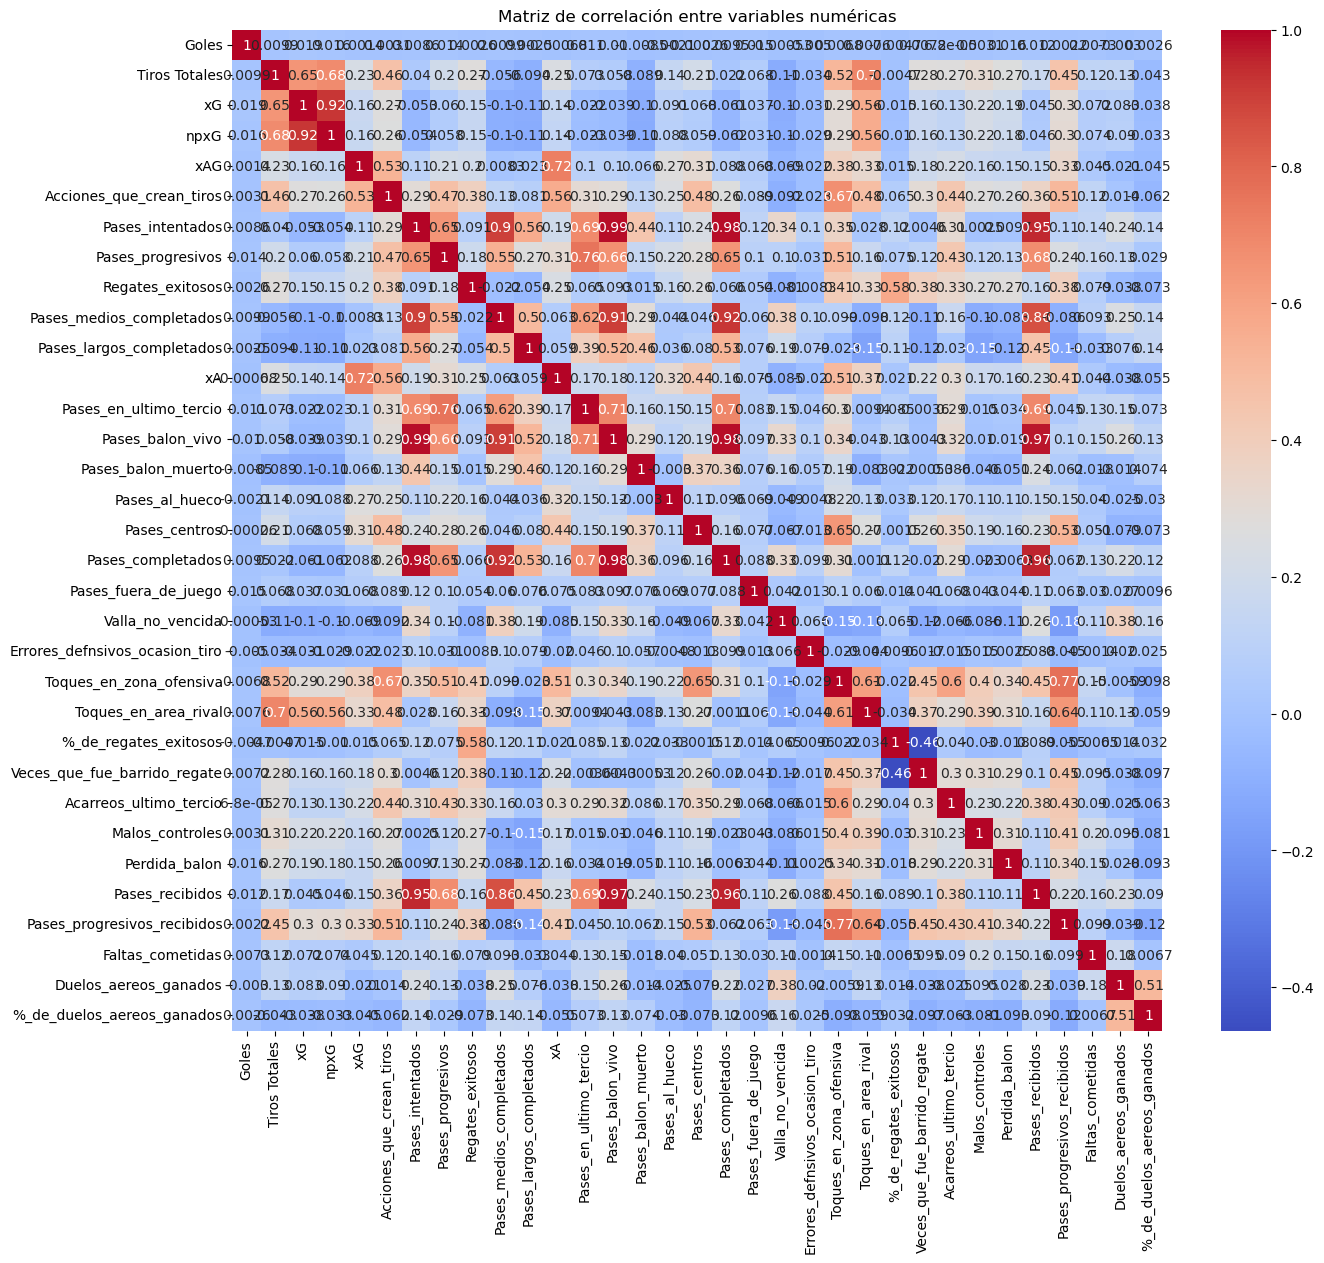

In [1804]:
corr_matrix = df_clean.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Hay unas columnas que claramente están correlacionadas las unas a las otras. Por ejemplo, el número de pases exitosos claramente está relacionada al número de pases largos exitosos, por lo cual vamos a deshacernos de las variables claramente correlacionadas.


In [1806]:
df_clean = df_clean.drop([
            'xG', ## Alta correlacion con #npxG
            'Pases_medios_completados',
            'Pases_completados', # Se da prioridad al numero de pases intentados, pues este codifica en cierta forma tambien el fallo en pases. 
            'Pases_recibidos', # tiene una alta correlación con pases_intentados 
            'Pases_balon_vivo', # La suma de balon vivo y balón muerto dan como resultado pasos intentados
            'Pases_balon_muerto', # La suma de balon vivo y balón muerto dan como resultado pasos intentado
            'Pases_completados', # alta correlación con Pases_intentados
            '%_de_duelos_aereos_ganados' #Codifica la misma informacion que numero de duelos aereos ganados pero en porcentaje
            ], axis=1)

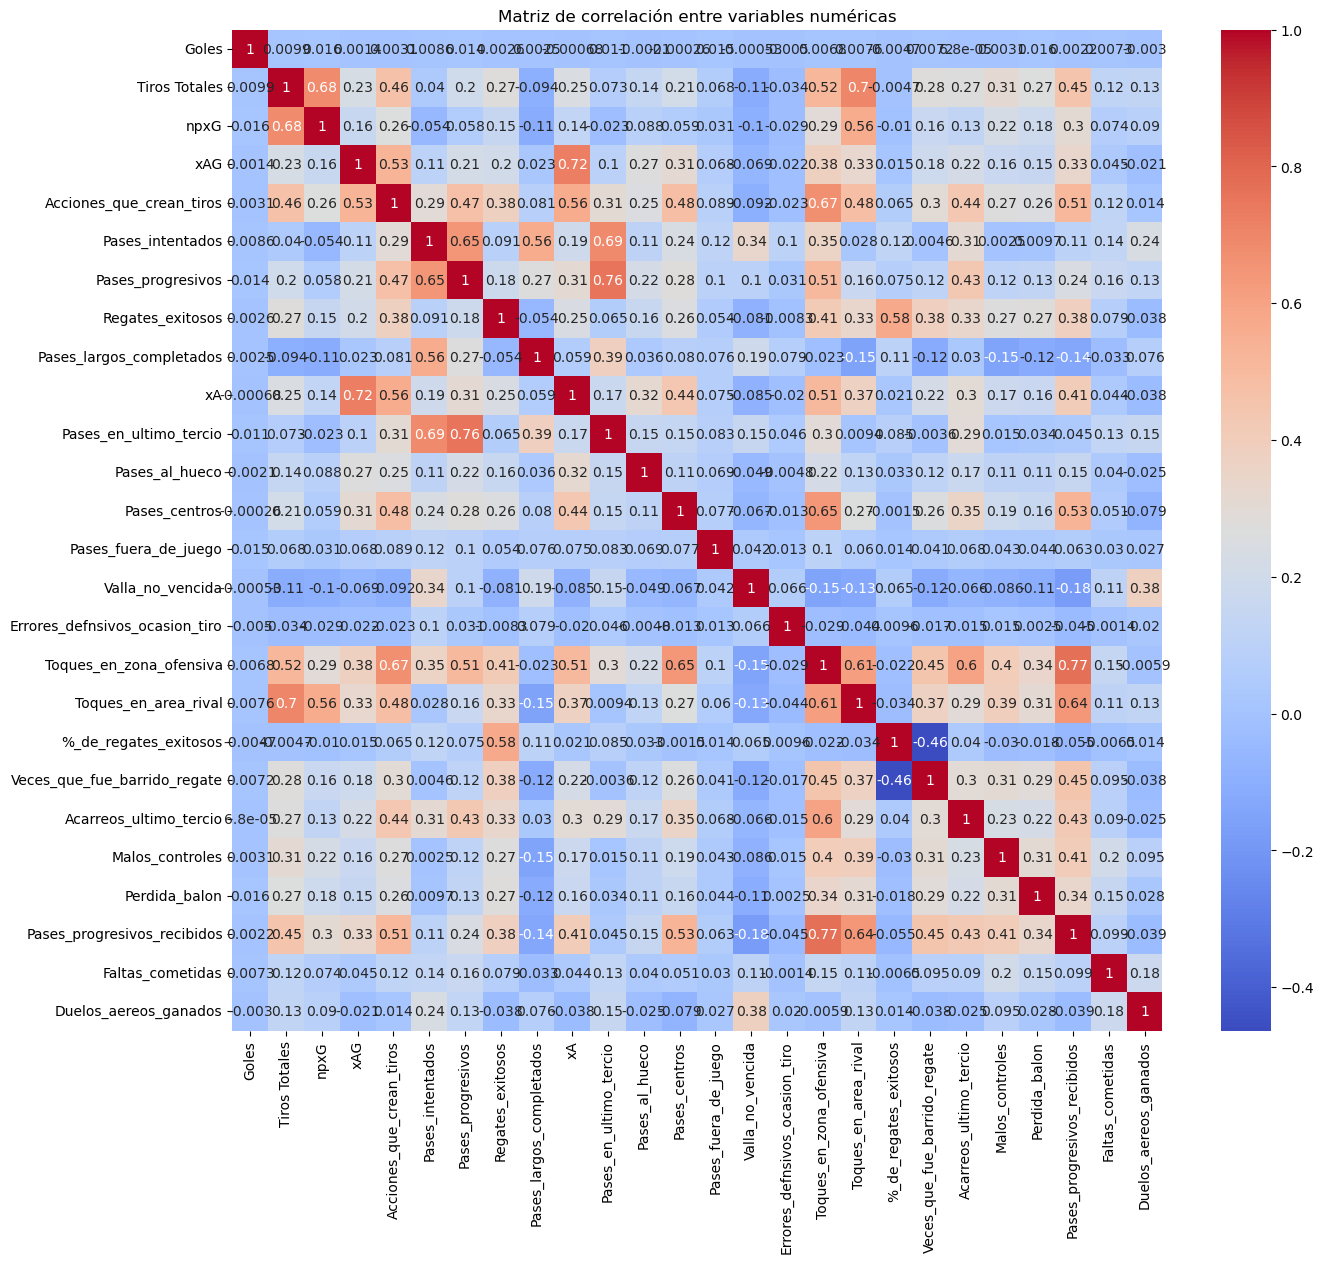

In [1807]:
corr_matrix = df_clean.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [1808]:
df_clean.describe()

,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Edad,market_value
count,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,17656.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,34580.000000,3.458000e+04
mean,0.390283,0.831058,0.084349,0.066082,1.488664,32.624234,2.498062,0.503759,2.417958,0.056776,2.060064,0.100983,1.164633,0.114083,1.514257,0.041845,9.665124,1.495315,43.287647,0.541238,0.842250,0.969433,0.582649,2.476952,0.792250,0.865905,25.757837,1.573288e+07
std,13.422949,1.193903,0.191192,0.155989,1.779256,22.836169,2.787234,0.921427,2.898488,0.123509,2.613137,0.352857,2.019582,0.352512,2.144765,0.209000,9.607437,2.040399,40.026294,0.944178,1.238504,1.235210,0.942470,3.242980,1.010508,1.327458,4.070307,7.888260e+07
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,-2.147484e+09
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,4.000000e+06
50%,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,25.000000,1.000000e+07
75%,0.000000,1.000000,0.100000,0.100000,2.000000,46.000000,4.000000,1.000000,4.000000,0.100000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,28.000000,2.500000e+07
max,995.000000,12.000000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,24.000000,1.400000,37.000000,8.000000,23.000000,5.000000,20.000000,3.000000,102.000000,25.000000,100.000000,10.000000,16.000000,10.000000,8.000000,36.000000,9.000000,16.000000,41.000000,1.000000e+09


A continuacion podemos buscar outliers en la columna de market_value

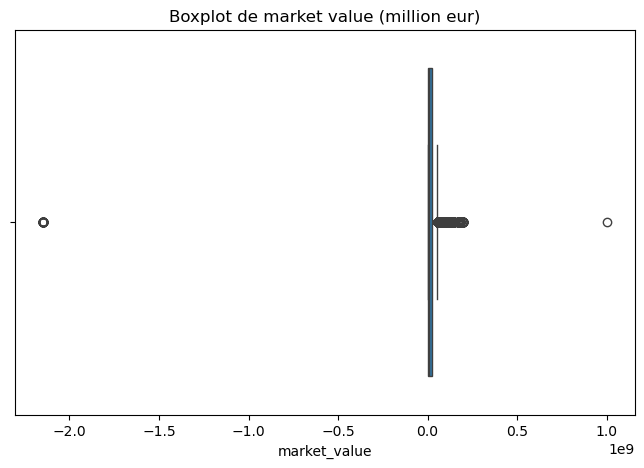

In [1810]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="market_value")
plt.title("Boxplot de market value (million eur)")
plt.show()

In [1811]:
print("filas con outliers: ",df_clean.shape[0])

df_clean = df_clean[df_clean['market_value'] >= 0]
df_clean = df_clean[df_clean['market_value'] < 0.5e9]

print("filas sin outliers: ",df_clean.shape[0])


filas con outliers:  34580
filas sin outliers:  34537


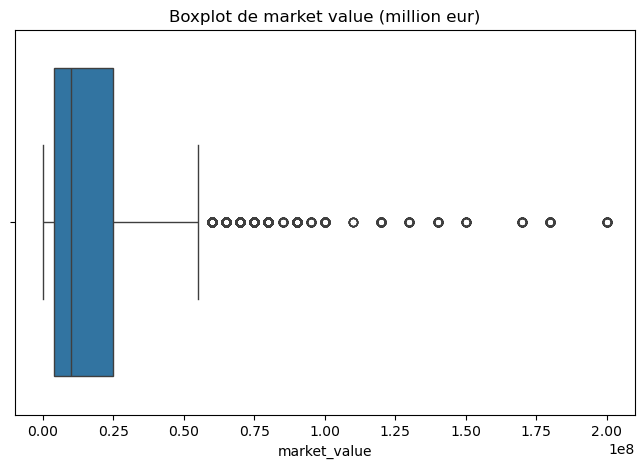

In [1812]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="market_value")
plt.title("Boxplot de market value (million eur)")
plt.show()

In [1813]:
df_clean.describe()

,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Edad,market_value
count,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,17634.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,3.453700e+04
mean,0.112604,0.831369,0.084373,0.066094,1.489041,32.614037,2.497553,0.503923,2.417031,0.056797,2.059559,0.101022,1.164896,0.113994,1.513999,0.041868,9.667053,1.495816,43.299688,0.541390,0.842488,0.969627,0.582535,2.477922,0.792194,0.865941,25.757014,1.833504e+07
std,2.140906,1.194099,0.191255,0.156011,1.779677,22.828421,2.787209,0.921705,2.898136,0.123542,2.612793,0.352961,2.020080,0.352372,2.144814,0.209062,9.609570,2.040842,40.030098,0.944503,1.238675,1.235492,0.942199,3.243324,1.010622,1.327631,4.069215,2.246193e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,4.000000e+06
50%,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,25.000000,1.000000e+07
75%,0.000000,1.000000,0.100000,0.100000,2.000000,46.000000,4.000000,1.000000,4.000000,0.100000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,28.000000,2.500000e+07
max,316.000000,12.000000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,24.000000,1.400000,37.000000,8.000000,23.000000,5.000000,20.000000,3.000000,102.000000,25.000000,100.000000,10.000000,16.000000,10.000000,8.000000,36.000000,9.000000,16.000000,41.000000,2.000000e+08


Vemos que aun quedan outliers en la columna de goles, luego les damos un manejo

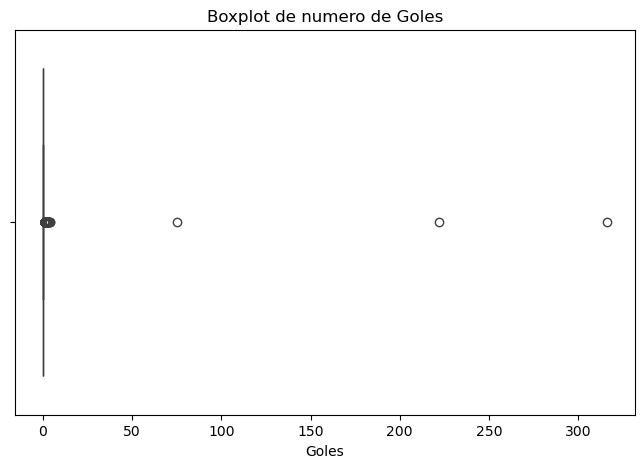

In [1815]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="Goles")
plt.title("Boxplot de numero de Goles")
plt.show()

Para dar manejo, multiplicamos el numero de tiros por la probabilidad de meter gol fuera de penalty. 

In [1817]:
# Identificar los outliers
outliers_goles = df_clean['Goles'] > 10

# Actualizar solo esos valores
df_clean.loc[outliers_goles, 'Goles'] = (df_clean.loc[outliers_goles, 'npxG'] * df_clean.loc[outliers_goles, 'Tiros Totales']).round().astype('int64')

# Verificar que se haya actualizado
display(df_clean[outliers_goles])


,Jugador,Dia_partido,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Nacionalidad,Posicion,Edad,market_value,contract_date
302,Abdoulaye Toure,"Saturday August 24, 2024",2,3,0.6,0.0,1,33,6,1,2,0.0,2,0,0,0,1,0,11,3,100.0,0,0,3,0,1,2,1,gn GUI,CM,30,3000000,30.06.2026
17093,Josue Casimir,"Saturday February 8, 2025",0,2,0.2,0.0,4,20,1,1,2,0.0,0,0,3,0,2,0,13,4,50.0,1,1,2,2,6,3,0,fr FRA,RM,23,4000000,30.06.2028
25200,Nhoa Sangui,"Friday April 11, 2025",0,0,0.0,0.1,2,8,2,1,0,0.0,0,0,0,0,1,0,2,0,100.0,0,1,0,0,1,0,0,fr FRA,LB,19,2500000,30.06.2030


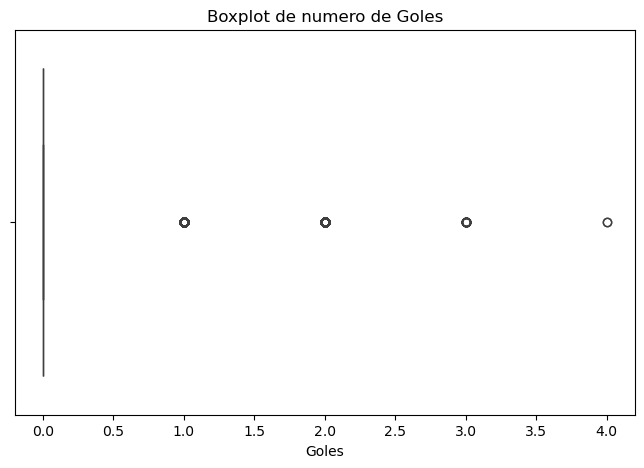

In [1818]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="Goles")
plt.title("Boxplot de numero de Goles")
plt.show()

In [1819]:
df_clean.describe()

,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Edad,market_value
count,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,17634.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,3.453700e+04
mean,0.094913,0.831369,0.084373,0.066094,1.489041,32.614037,2.497553,0.503923,2.417031,0.056797,2.059559,0.101022,1.164896,0.113994,1.513999,0.041868,9.667053,1.495816,43.299688,0.541390,0.842488,0.969627,0.582535,2.477922,0.792194,0.865941,25.757014,1.833504e+07
std,0.325579,1.194099,0.191255,0.156011,1.779677,22.828421,2.787209,0.921705,2.898136,0.123542,2.612793,0.352961,2.020080,0.352372,2.144814,0.209062,9.609570,2.040842,40.030098,0.944503,1.238675,1.235492,0.942199,3.243324,1.010622,1.327631,4.069215,2.246193e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,4.000000e+06
50%,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,25.000000,1.000000e+07
75%,0.000000,1.000000,0.100000,0.100000,2.000000,46.000000,4.000000,1.000000,4.000000,0.100000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,28.000000,2.500000e+07
max,4.000000,12.000000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,24.000000,1.400000,37.000000,8.000000,23.000000,5.000000,20.000000,3.000000,102.000000,25.000000,100.000000,10.000000,16.000000,10.000000,8.000000,36.000000,9.000000,16.000000,41.000000,2.000000e+08


In [1820]:
display(df_clean.head())

,Jugador,Dia_partido,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Nacionalidad,Posicion,Edad,market_value,contract_date
0,Aaron Ciammaglichella,"Sunday August 25, 2024",0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,it ITA,CM,19,700000,30.06.2026
1,Aaron Martin,"Friday April 4, 2025",0,0,0.0,0.0,1,73,4,0,1,0.1,3,0,4,1,1,0,26,2,0.0,1,1,1,3,6,1,0,es ESP,WB,27,6500000,30.06.2026
2,Aaron Martin,"Friday January 17, 2025",0,0,0.0,0.0,0,43,1,0,1,0.0,1,0,2,0,0,0,5,0,NaN,0,2,0,1,1,0,0,es ESP,LB,27,6500000,30.06.2026
3,Aaron Martin,"Friday March 14, 2025",0,0,0.0,0.0,1,40,2,0,1,0.0,2,0,5,0,3,0,10,0,0.0,1,1,0,0,3,2,0,es ESP,"LB,LW,LM",27,6500000,30.06.2026
4,Aaron Martin,"Friday March 7, 2025",0,0,0.0,0.1,4,79,8,0,12,0.3,5,0,11,0,0,0,19,0,NaN,0,3,0,0,0,1,0,es ESP,"LB,LW",27,6500000,30.06.2026


In [1821]:
df_clean = df_clean.drop(['Nacionalidad', 'contract_date'], axis=1) # eliminamos columnas que no aportan información relevante

In [1822]:
df_clean = df_clean.drop(['%_de_regates_exitosos'], axis=1) # la eliminamos ya que tiene un gran porcentaje de nulos 36% como se vio en el análisis de calidad de datos

In [1823]:
display(df_clean.head())

,Jugador,Dia_partido,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Posicion,Edad,market_value
0,Aaron Ciammaglichella,"Sunday August 25, 2024",0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CM,19,700000
1,Aaron Martin,"Friday April 4, 2025",0,0,0.0,0.0,1,73,4,0,1,0.1,3,0,4,1,1,0,26,2,1,1,1,3,6,1,0,WB,27,6500000
2,Aaron Martin,"Friday January 17, 2025",0,0,0.0,0.0,0,43,1,0,1,0.0,1,0,2,0,0,0,5,0,0,2,0,1,1,0,0,LB,27,6500000
3,Aaron Martin,"Friday March 14, 2025",0,0,0.0,0.0,1,40,2,0,1,0.0,2,0,5,0,3,0,10,0,1,1,0,0,3,2,0,"LB,LW,LM",27,6500000
4,Aaron Martin,"Friday March 7, 2025",0,0,0.0,0.1,4,79,8,0,12,0.3,5,0,11,0,0,0,19,0,0,3,0,0,0,1,0,"LB,LW",27,6500000


In [1824]:
df_clean.describe()

,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Edad,market_value
count,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,3.453700e+04
mean,0.094913,0.831369,0.084373,0.066094,1.489041,32.614037,2.497553,0.503923,2.417031,0.056797,2.059559,0.101022,1.164896,0.113994,1.513999,0.041868,9.667053,1.495816,0.541390,0.842488,0.969627,0.582535,2.477922,0.792194,0.865941,25.757014,1.833504e+07
std,0.325579,1.194099,0.191255,0.156011,1.779677,22.828421,2.787209,0.921705,2.898136,0.123542,2.612793,0.352961,2.020080,0.352372,2.144814,0.209062,9.609570,2.040842,0.944503,1.238675,1.235492,0.942199,3.243324,1.010622,1.327631,4.069215,2.246193e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,4.000000e+06
50%,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,25.000000,1.000000e+07
75%,0.000000,1.000000,0.100000,0.100000,2.000000,46.000000,4.000000,1.000000,4.000000,0.100000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,14.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,28.000000,2.500000e+07
max,4.000000,12.000000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,24.000000,1.400000,37.000000,8.000000,23.000000,5.000000,20.000000,3.000000,102.000000,25.000000,10.000000,16.000000,10.000000,8.000000,36.000000,9.000000,16.000000,41.000000,2.000000e+08


Vemos que aun quedan outliers en la columna de goles, luego les damos un manejo

Ahora bien, a partir del entendimiento del problema se determina que existen 2 alternativas para crear el modelo. La primera consiste en preservar las posiciones y hacer un one-hot encode de ellas y manejar un solo modelo de regresion. La otra alternativa consiste en separar a los jugadores segun su posicion mas comun, y para cada posicion construir un modelo diferente.  

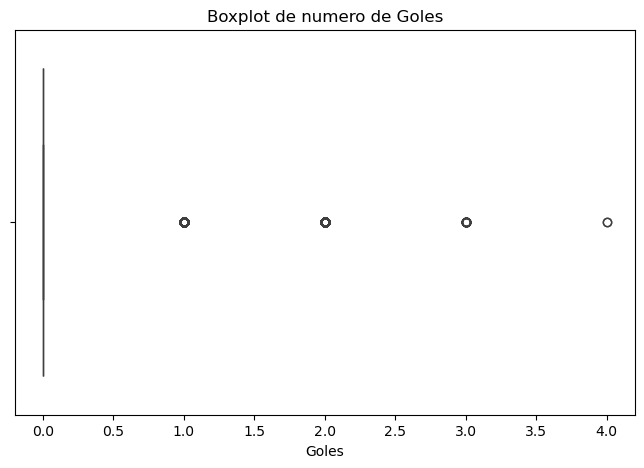

In [1827]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="Goles")
plt.title("Boxplot de numero de Goles")
plt.show()

Para dar manejo, multiplicamos el numero de tiros por la probabilidad de meter gol fuera de penalty. 

In [1829]:
# Identificar los outliers
outliers_goles = df_clean['Goles'] > 10

# Actualizar solo esos valores
df_clean.loc[outliers_goles, 'Goles'] = (df_clean.loc[outliers_goles, 'npxG'] * df_clean.loc[outliers_goles, 'Tiros Totales']).round().astype('int64')

# Verificar que se haya actualizado
display(df_clean[outliers_goles])


,Jugador,Dia_partido,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Posicion,Edad,market_value


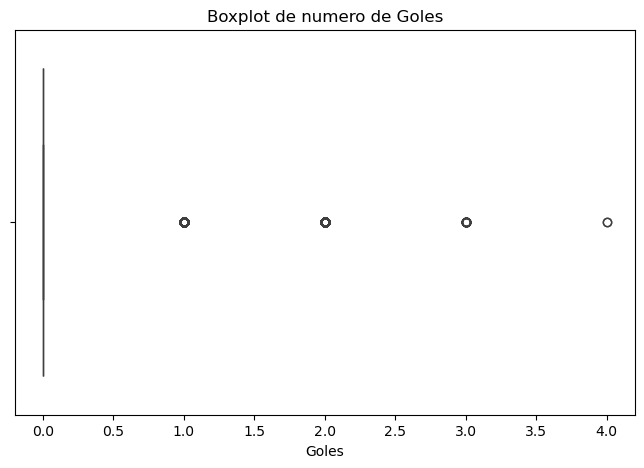

In [1830]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="Goles")
plt.title("Boxplot de numero de Goles")
plt.show()

In [1831]:
df_clean.describe()

,Goles,Tiros Totales,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,Edad,market_value
count,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,3.453700e+04
mean,0.094913,0.831369,0.084373,0.066094,1.489041,32.614037,2.497553,0.503923,2.417031,0.056797,2.059559,0.101022,1.164896,0.113994,1.513999,0.041868,9.667053,1.495816,0.541390,0.842488,0.969627,0.582535,2.477922,0.792194,0.865941,25.757014,1.833504e+07
std,0.325579,1.194099,0.191255,0.156011,1.779677,22.828421,2.787209,0.921705,2.898136,0.123542,2.612793,0.352961,2.020080,0.352372,2.144814,0.209062,9.609570,2.040842,0.944503,1.238675,1.235492,0.942199,3.243324,1.010622,1.327631,4.069215,2.246193e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,4.000000e+06
50%,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,25.000000,1.000000e+07
75%,0.000000,1.000000,0.100000,0.100000,2.000000,46.000000,4.000000,1.000000,4.000000,0.100000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,14.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,28.000000,2.500000e+07
max,4.000000,12.000000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,24.000000,1.400000,37.000000,8.000000,23.000000,5.000000,20.000000,3.000000,102.000000,25.000000,10.000000,16.000000,10.000000,8.000000,36.000000,9.000000,16.000000,41.000000,2.000000e+08


In [1832]:
df_clean.columns

Index(['Jugador', 'Dia_partido', 'Goles', 'Tiros Totales', 'npxG', 'xAG',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_progresivos',
       'Regates_exitosos', 'Pases_largos_completados', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_al_hueco', 'Pases_centros',
       'Pases_fuera_de_juego', 'Valla_no_vencida',
       'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva',
       'Toques_en_area_rival', 'Veces_que_fue_barrido_regate',
       'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon',
       'Pases_progresivos_recibidos', 'Faltas_cometidas',
       'Duelos_aereos_ganados', 'Posicion', 'Edad', 'market_value'],
      dtype='object')

### One-hot encoding y agregar por jugador

In [1834]:
# quitamos la columna dia partido
df_clean.drop(columns=["Dia_partido"])


# One-hot encoding
              
df_clean["Posicion"] = df_clean["Posicion"].fillna("").astype(str)

# Separamos por coma
df_clean["Posicion"] = df_clean["Posicion"].apply(lambda x: x.split(",") if x != "" else [])

# One-hot encode
mlb = MultiLabelBinarizer()
positions_encoded = pd.DataFrame(
    mlb.fit_transform(df_clean["Posicion"]),
    columns=mlb.classes_,
    index=df_clean.index
)

# Concatenate
df_clean = pd.concat([df_clean.drop(columns=["Posicion"]), positions_encoded], axis=1)

df_clean.head()


## Agregamos


agg_dict = {
    # Sumamos la producción acumulada en toda la temporada o en todos los partidos analizados de las siguientes variables
    "Goles": "sum",
    "Acciones_que_crean_tiros": "sum",
    "Errores_defnsivos_ocasion_tiro": "sum",
    "Faltas_cometidas": "sum",
    "Veces_que_fue_barrido_regate": "sum",
    "Duelos_aereos_ganados": "sum",
    "Valla_no_vencida": "sum",
    
    # Sacamos el promedio cuando la métrica puede es dependiente de por ejemplo la duración del partido: 
    "Tiros Totales": "mean",
    "npxG": "mean",
    "Pases_intentados": "mean",
    "Pases_progresivos": "mean",
    "Regates_exitosos": "mean",
    "Pases_largos_completados": "mean",
    "xA": "mean",
    "xAG": "mean",
    "Pases_en_ultimo_tercio": "mean",
    "Pases_al_hueco": "mean",
    "Pases_centros": "mean",
    "Pases_fuera_de_juego": "mean",
    "Toques_en_zona_ofensiva": "mean",
    "Toques_en_area_rival": "mean",
    "Acarreos_ultimo_tercio": "mean",
    "Malos_controles": "mean",
    "Perdida_balon": "mean",
    "Pases_progresivos_recibidos": "mean",
    
    # Constantes:
    "Edad": "last",
    "market_value": "last",

    # Totales de posiciones
    "AM": "sum",
    "CB": "sum",
    "CM": "sum",
    "DM": "sum",
    "FW": "sum",
    "GK": "sum",
    "LB": "sum",
    "LM": "sum",
    "LW": "sum",
    "RB": "sum",
    "RM": "sum",
    "RW": "sum",
    "WB": "sum"
}

df_agg = df_clean.groupby("Jugador").agg(agg_dict)

Ahora mostramos la frecuencia relativa por cada posición, ya que la representación de partidos por cada jugador no es homogénea

In [1836]:
# Columnas a sacar freq relativa:
position_cols = ["AM","CB","CM","DM","FW","GK","LB","LM","LW","RB","RM","RW","WB"]

# Obtenemos la freq relativa:
df_rel_freq = df_agg[position_cols].div(df_agg[position_cols].sum(axis=1), axis=0)

df_agg

,Goles,Acciones_que_crean_tiros,Errores_defnsivos_ocasion_tiro,Faltas_cometidas,Veces_que_fue_barrido_regate,Duelos_aereos_ganados,Valla_no_vencida,Tiros Totales,npxG,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,xA,xAG,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_fuera_de_juego,Toques_en_zona_ofensiva,Toques_en_area_rival,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Edad,market_value,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB
Jugador,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Ciammaglichella,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19,700000,0,0,1,0,0,0,0,0,0,0,0,0,0
Aaron Martin,0,95,1,38,12,20,73,0.444444,0.016667,46.805556,2.500000,0.333333,4.444444,0.161111,0.150000,2.138889,0.000000,7.111111,0.138889,16.888889,0.555556,0.861111,0.611111,0.472222,3.000000,28,6500000,0,0,1,0,0,0,24,2,4,0,0,0,13
Aaron Ramsdale,0,3,3,1,0,6,10,0.000000,0.000000,40.766667,0.000000,0.000000,8.566667,0.000000,0.000000,1.200000,0.000000,0.000000,0.233333,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,26,16000000,0,0,0,0,0,30,0,0,0,0,0,0,0
Aaron WanBissaka,2,93,0,25,43,22,125,0.444444,0.025000,50.416667,4.138889,1.777778,1.333333,0.063889,0.094444,2.611111,0.138889,2.111111,0.111111,17.694444,1.333333,1.805556,0.972222,0.611111,4.638889,27,24000000,0,0,0,0,0,0,14,0,1,26,2,1,15
Abakar Sylla,1,4,0,17,3,20,63,0.238095,0.023810,31.333333,1.000000,0.142857,1.047619,0.000000,0.004762,1.000000,0.000000,0.047619,0.000000,1.238095,0.428571,0.047619,0.238095,0.190476,0.142857,21,10000000,0,19,1,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeki Celik,0,38,3,31,4,30,84,0.419355,0.016129,44.000000,3.419355,0.258065,2.354839,0.019355,0.051613,3.548387,0.000000,1.354839,0.064516,11.354839,1.290323,0.870968,0.645161,0.258065,3.000000,27,6000000,0,13,0,0,0,0,0,0,0,10,0,0,16
Zion Suzuki,0,9,4,3,0,13,35,0.000000,0.000000,40.432432,0.000000,0.000000,8.675676,0.000000,0.000000,1.270270,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,22,10000000,0,0,0,0,0,37,0,0,0,0,0,0,0
Zito Luvumbo,2,35,0,38,25,6,4,0.884615,0.076923,11.615385,1.192308,0.961538,0.461538,0.084615,0.111538,0.615385,0.000000,2.500000,0.000000,10.653846,2.576923,0.807692,2.576923,1.115385,4.807692,23,5000000,5,0,2,2,10,0,0,1,6,0,5,5,0


### Particionamiento del conjunto de datos en entrenamiento y prueba

In [1838]:
features = df_agg.select_dtypes(include=['float64','int64']).columns

X_train, X_test, y_train, y_test = train_test_split(df_agg[features], df_agg["market_value"], test_size=0.3, random_state=1)
X_train.shape, y_train.shape

((1073, 25), (1073,))

### Escalar

Utilizamos un StandardScaler()

In [1840]:
scaler = StandardScaler()

# Ajustamos en train y transformamos en train/test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modelado 

In [1842]:
regression = LinearRegression()

regression.fit(X_train_scaled, y_train)

LinearRegression()

In [1901]:
y_pred = regression.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 9726188.189205592
RMSE: 14445171.50092685
R²: 0.3972149850433435
